In [15]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import math
from statistics import mean
from matplotlib import cm
from numpy import linalg as LA

import warnings
warnings.simplefilter("ignore")

### Speed for single clusters

In [19]:
fname = os.path.join("/Users/emysk/Desktop/ipre3/killifish/data/Wc__0_75__psi__2__D__1__ftax__0__500__cells_sphere__25__forg__0-20-11-05-12-14", 'step-%05d.pickle')

single_clusters_time_step = []

#finding the time step where one cluster forms
for t in range(0,10000,10):
        # Get the cell states
    data = pickle.load(open(fname%t, 'rb'))
    cs = data['cellStates']
        # Construct a graph with cells as nodes and cell-cell contacts as edges
    G = nx.Graph()
    for id,cell in cs.items():
        for n in cell.neighbours:
            G.add_edge(id, n)
        
    for c in nx.connected_components(G):
        if len(c) == 500:
            single_clusters_time_step.append(t)

# mean position for all cells in each time step
all_mean_pos = []
for time in single_clusters_time_step:
        data = pickle.load(open(fname%time, 'rb'))
        cs = data['cellStates']
        cell_pos = []
        for id,state in cs.items():
            cell_pos.append(state.pos)
            
        cell_array_pos = np.array(cell_pos)
        all_mean_pos.append(cell_array_pos.mean(axis=0))
        
velocities = []           
#speed of cluster between each time step
for p in range(1, len(all_mean_pos)):
    vector = all_mean_pos[p] - all_mean_pos[p - 1]
    velocity = vector / (single_clusters_time_step[p] - single_clusters_time_step[p - 1])
    speed = LA.norm(velocity)
    print(f"Speed in time step {single_clusters_time_step[p-1]}-{single_clusters_time_step[p]}: " ,speed)
    velocities.append(speed)



Speed in time step 6360-6370:  0.009485215
Speed in time step 6370-6380:  0.009185132
Speed in time step 6380-6390:  0.012569778
Speed in time step 6390-6400:  0.012366414
Speed in time step 6400-6410:  0.009096227
Speed in time step 6410-6420:  0.006639455
Speed in time step 6420-6430:  0.012483969
Speed in time step 6430-6440:  0.010791519
Speed in time step 6440-6450:  0.014394376
Speed in time step 6450-6460:  0.011943941
Speed in time step 6460-6470:  0.007830715
Speed in time step 6470-6480:  0.009004478
Speed in time step 6480-6490:  0.0025743176
Speed in time step 6490-6500:  0.00535082
Speed in time step 6500-6510:  0.018078944
Speed in time step 6510-6520:  0.015326985
Speed in time step 6520-6530:  0.0093328925
Speed in time step 6530-6540:  0.0048732804
Speed in time step 6540-6550:  0.009084397
Speed in time step 6550-6560:  0.008757794
Speed in time step 6560-6570:  0.0050236178
Speed in time step 6570-6580:  0.008053444
Speed in time step 6580-6590:  0.009733484
Speed in

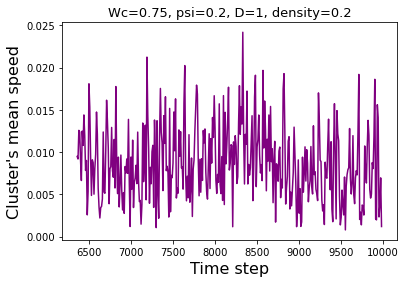

In [22]:
plt.plot(single_clusters_time_step[0: (len(single_clusters_time_step) - 1)], velocities,color='purple')
plt.title(f"Wc=0.75, psi=0.2, D=1, density=0.2", fontsize=13)
plt.xlabel("Time step", fontsize=16)
plt.ylabel("Cluster's mean speed", fontsize=16)
plt.show()

## Guillermo's way

In [ ]:
sims = ['Wc__0_75__psi__2__D__1__ftax__0__500__cells_sphere__25__forg__0-20-11-05-12-14',
       'Wc__0_875__psi__2__D__1__ftax__0__500__cells_sphere__25__forg__0-20-11-05-16-47']

all_speeds = []
for sim in sims:
    fname = os.path.join('../../../cellmodeller/data/killifish/Sims 11-05_long/'+sim, 'step-%05d.pickle')
    #fname = os.path.join("/Users/emysk/Desktop/ipre3/killifish/data/Wc__1__psi__0_5__D__0_5__ftax__0__500__cells_sphere__15__forg__0-20-10-22-16-43", 'step-%05d.pickle')

    single_clusters_time_step = []

    #finding the time step where one cluster forms
    for t in range(0,10000,10):
        # Get the cell states
        data = pickle.load(open(fname%t, 'rb'))
        cs = data['cellStates']
            # Construct a graph with cells as nodes and cell-cell contacts as edges
        G = nx.Graph()
        for id,cell in cs.items():
            for n in cell.neighbours:
                G.add_edge(id, n)

        for c in nx.connected_components(G):
            if len(c) == 500:
                single_clusters_time_step.append(t)


    # mean position for all cells in each time step
    pos_per_time = {}
    for time in single_clusters_time_step:
        data = pickle.load(open(fname%time, 'rb'))
        cs = data['cellStates']
        pos_this_time = {}
        for id,cell in cs.items():
            pos_this_time[id] = cell.pos
        pos_per_time[time] = pos_this_time


    times = list(pos_per_time.keys())
    times.sort()
    vel_per_time = {}
    for idx,t_2 in enumerate(times[1:]):
        vel_this_time = {}
        for id,cell_pos_2 in pos_per_time[t_2].items():
            # for cell: id
            t_1 = times[idx]
            dX = np.array(cell_pos_2) - np.array(pos_per_time[t_1][id])
            dX_dt = dX/(t_2 - t_1)
            dX_dt_norm = LA.norm(dX_dt)
            vel_this_time[id] = [dX_dt, dX_dt_norm]
            #print(t_2-times[idx])
        vel_per_time[t_2] = vel_this_time

    avg_speed_per_time = {}
    for t, cells in vel_per_time.items():
        speeds = []
        for id,cell in cells.items():
            speeds.append(cell[1])
        avg_speed_per_time[t] = np.mean(np.array(speeds))
    all_speeds.append(avg_speed_per_time)
    plt.plot(avg_speed_per_time.keys(), avg_speed_per_time.values())
    plt.show()